# 2. Logistic Regression

## 2.1 逻辑回归
### Logistic函数 (Sigmoid)
### 为什么Sigmoid函数可以表示二分类概率？详见伯努利分布和指数分布族
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$
合起来，我们得到逻辑回归模型的假设函数：
$${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta}^{T}}X}}}$$
### 损失函数
### 关于交叉熵详见Liu II
Binary Cross Entropy
$$loss=-(y\log{\hat{y}}+(1-y)\log{(1-\hat{y})})$$
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}{(y\log{h_{\theta}(x)}-(1-y)\log{(1-h_{\theta}(x))})}$$
### 梯度下降
$$\theta_{j}=\theta_{j}-\alpha\frac{1}{m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}}$$

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.loadtxt(fname='ex2data1.txt',delimiter=",")
data

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

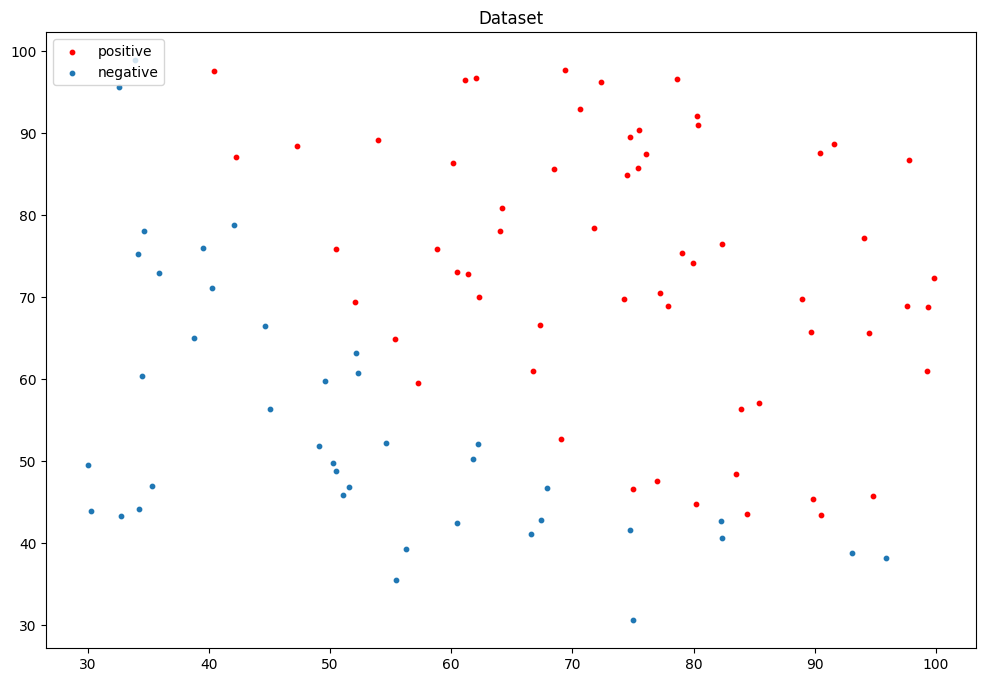

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
positive_data_idx= np.where(data[:,2]==1)
positive_data = data[positive_data_idx]
negative_data_idx= np.where(data[:, 2] == 0)
negative_data = data[negative_data_idx]
ax.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
ax.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
ax.set_title("Dataset")
plt.legend(loc=2)
plt.show()

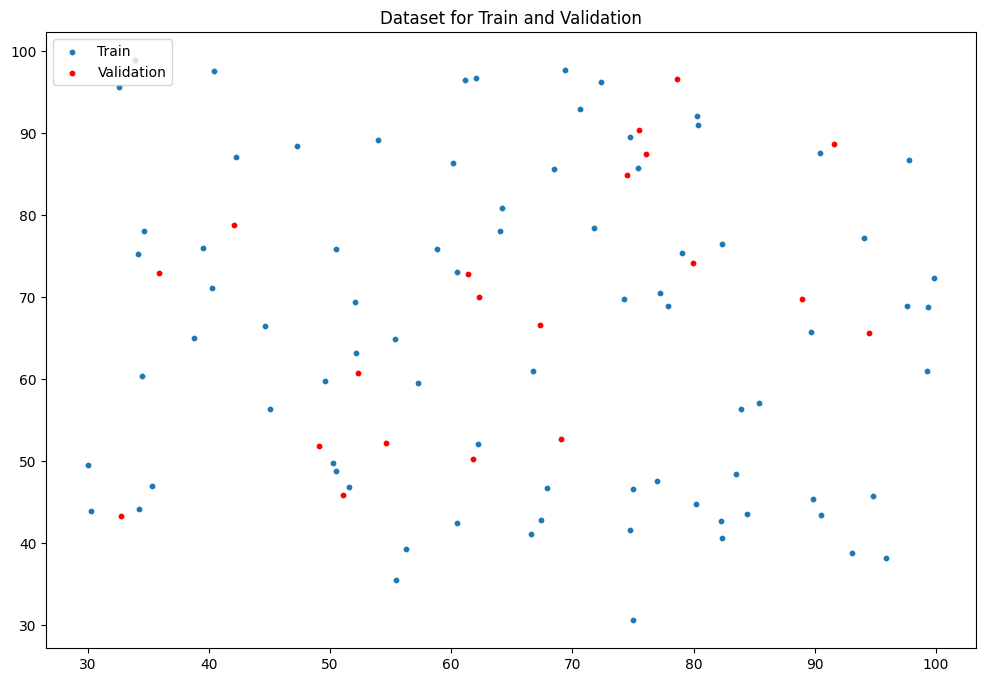

In [4]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data[:, :-1], data[:, -1], test_size=0.2)
# train_x, val_x, train_y, val_y = data[:, :-1], data[:, :-1], data[:, -1], data[:, -1]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train_x[:,0], y=train_x[:,1], s=10, label="Train")
ax.scatter(x=val_x[:,0], y=val_x[:,1], s=10, color="red", label="Validation")
ax.set_title('Dataset for Train and Validation')
ax.legend(loc=2)
plt.show()

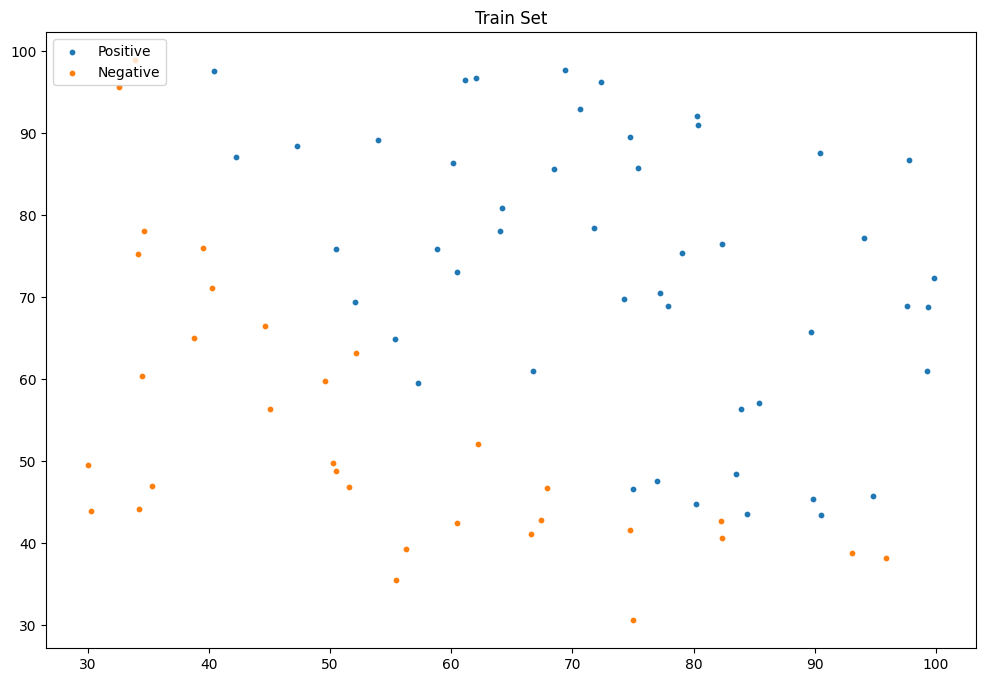

In [5]:
positive_train_data = train_x[np.where(train_y[:]==1)]
negative_train_data = train_x[np.where(train_y[:]==0)]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=positive_train_data[:,0], y=positive_train_data[:,1], s=10, label="Positive")
ax.scatter(x=negative_train_data[:,0], y=negative_train_data[:,1], s=10, label="Negative")
ax.set_title('Train Set')
ax.legend(loc=2)
plt.show()

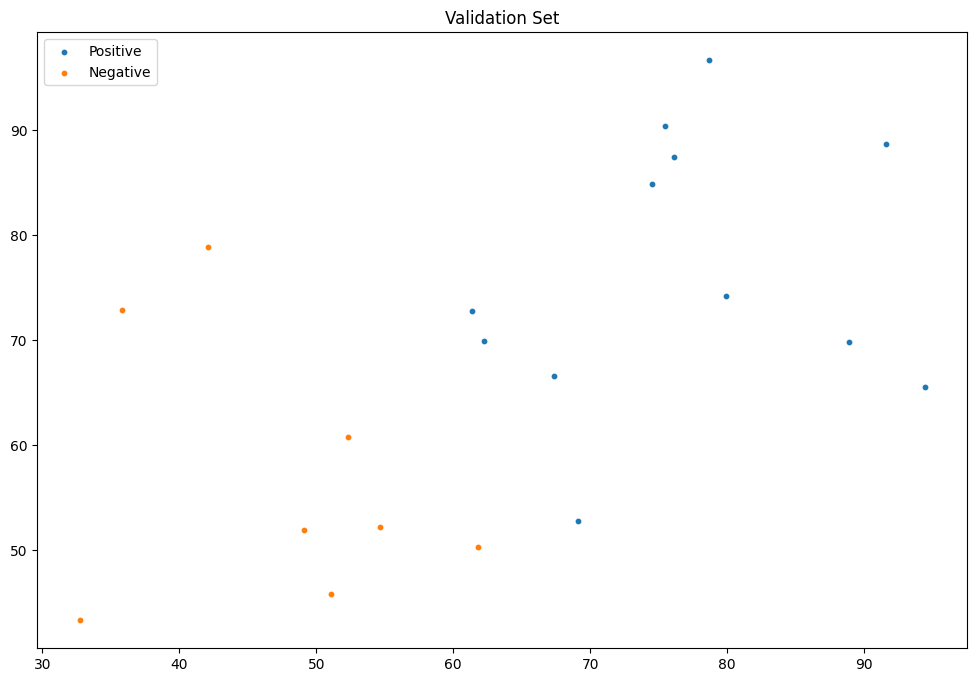

In [6]:
positive_val_data = val_x[np.where(val_y[:]==1)]
negative_val_data = val_x[np.where(val_y[:]==0)]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=positive_val_data[:,0], y=positive_val_data[:,1], s=10, label="Positive")
ax.scatter(x=negative_val_data[:,0], y=negative_val_data[:,1], s=10, label="Negative")
ax.legend(loc=2)
ax.set_title('Validation Set')
plt.show()

In [7]:
train_y_ex = np.expand_dims(train_y,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)
val_y_ex.shape

(20, 1)

In [8]:
from LogisticRegression import LogisticRegression

epochs = 5000
alpha = 0.01
logistic_reg = LogisticRegression(x=train_x,y=train_y_ex,val_x=val_x,val_y=val_y_ex,epoch=epochs,lr=alpha)
theta,train_loss,val_loss = logistic_reg.train()
theta

Epoch: 1/5000, Train Loss: 0.4159
Accuracy on Val set: 95.00%
Epoch: 2/5000, Train Loss: 0.4150
Accuracy on Val set: 95.00%
Epoch: 3/5000, Train Loss: 0.4141
Accuracy on Val set: 95.00%
Epoch: 4/5000, Train Loss: 0.4131
Accuracy on Val set: 95.00%
Epoch: 5/5000, Train Loss: 0.4122
Accuracy on Val set: 95.00%
Epoch: 6/5000, Train Loss: 0.4113
Accuracy on Val set: 95.00%
Epoch: 7/5000, Train Loss: 0.4104
Accuracy on Val set: 95.00%
Epoch: 8/5000, Train Loss: 0.4096
Accuracy on Val set: 95.00%
Epoch: 9/5000, Train Loss: 0.4087
Accuracy on Val set: 95.00%
Epoch: 10/5000, Train Loss: 0.4078
Accuracy on Val set: 95.00%
Epoch: 11/5000, Train Loss: 0.4069
Accuracy on Val set: 95.00%
Epoch: 12/5000, Train Loss: 0.4060
Accuracy on Val set: 95.00%
Epoch: 13/5000, Train Loss: 0.4052
Accuracy on Val set: 95.00%
Epoch: 14/5000, Train Loss: 0.4043
Accuracy on Val set: 95.00%
Epoch: 15/5000, Train Loss: 0.4034
Accuracy on Val set: 95.00%
Epoch: 16/5000, Train Loss: 0.4026
Accuracy on Val set: 95.00%
E

array([[-15.05479808,   0.12208876,   0.1211456 ]])

In [9]:
acc, test_loss = logistic_reg.test(val_x,val_y_ex)
print("Accuracy on Test Set: {:.2f}%; Test Loss: {:.4f}".format(acc * 100,test_loss))
from sklearn.metrics import f1_score
f1 = f1_score(y_true=val_y_ex,y_pred=logistic_reg.predict(val_x))
print("My F1 Score: {:.4f}".format(f1))

Accuracy on Test Set: 95.00%; Test Loss: 0.0855
My F1 Score: 0.9565


In [10]:
from sklearn.linear_model import LogisticRegression
sk_lr = LogisticRegression(max_iter=50000)
sk_lr.fit(train_x,train_y)
sk_pred = sk_lr.predict(val_x)
count = np.sum(np.equal(sk_pred,val_y))
sk_acc = count/val_y.shape[0]
sk_prob = sk_lr.predict_proba(val_x)

from LogisticRegression import bce_loss
sk_loss = bce_loss(sk_prob[:,1], val_y_ex)
sk_theta = np.array([[sk_lr.intercept_[0],sk_lr.coef_[0,0],sk_lr.coef_[0,1]]])
sk_f1 = f1_score(y_true=val_y_ex,y_pred=sk_pred)
print("Sklearn Accuracy: {:.2f}%".format(sk_acc * 100))
print("Sklearn Val Loss: {:.4f}".format(sk_loss))
print("SKlearn Parameters: ",sk_theta)
print("Sklearn F1 Score: {:.4f}".format(sk_f1))

Sklearn Accuracy: 95.00%
Sklearn Val Loss: 0.9206
SKlearn Parameters:  [[-23.04163424   0.18590423   0.18699029]]
Sklearn F1 Score: 0.9565


[[124.27027879  -1.00778529  -1.        ]]


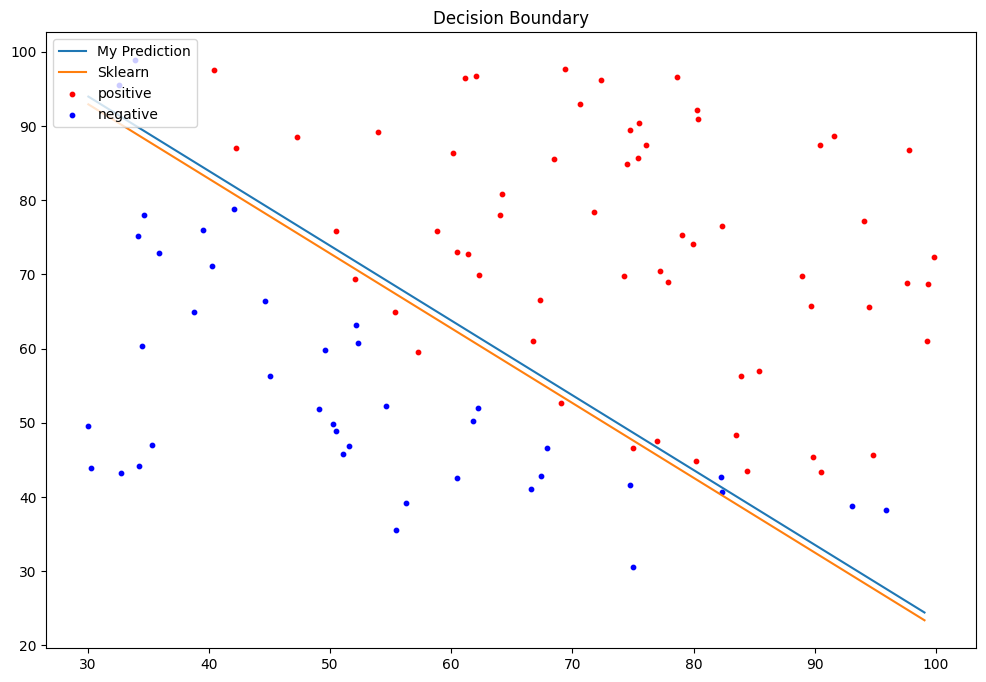

In [11]:
coef = -(theta / theta[0,2])  # find the
coef1 = -(sk_theta / sk_theta[0,2])
print(coef)

x = np.arange(data[:,0].min(), data[:,0].max(), step=1)
y = coef[0,0] + coef[0,1]*x
y1 = coef1[0,0] + coef[0,1]*x
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,y,label="My Prediction")
ax.plot(x,y1,label="Sklearn")
ax.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
ax.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, color="blue",label="negative")
ax.set_title("Decision Boundary")
plt.legend(loc=2)
plt.show()

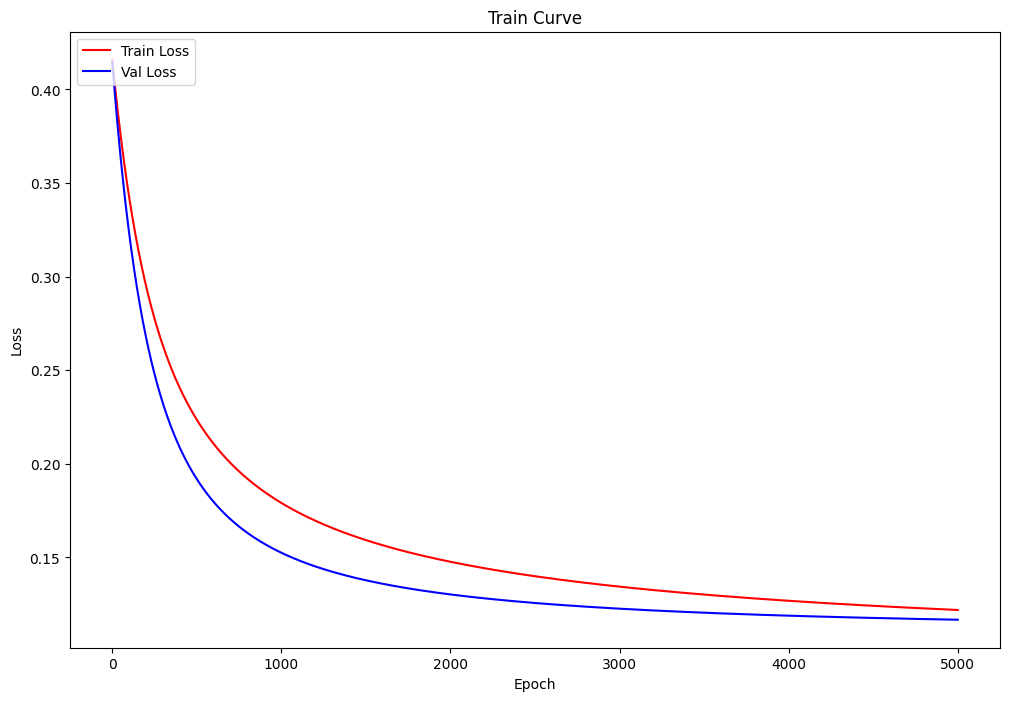

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1,epochs+1), train_loss, 'r', label="Train Loss")
ax.plot(np.arange(1,epochs+1), val_loss, 'b', label="Val Loss")
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Train Curve')
plt.legend(loc=2)
plt.show()

## 2.2 正则化
### regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$
正则化项实现了对参数的缩小，使得某些导致过拟合的特征的参数变小。
从另一个角度来说，使得对损失不敏感的参数缩小较大，对损失敏感的参数缩小较小。详见Deep Learning

In [13]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
data

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

查看数据集

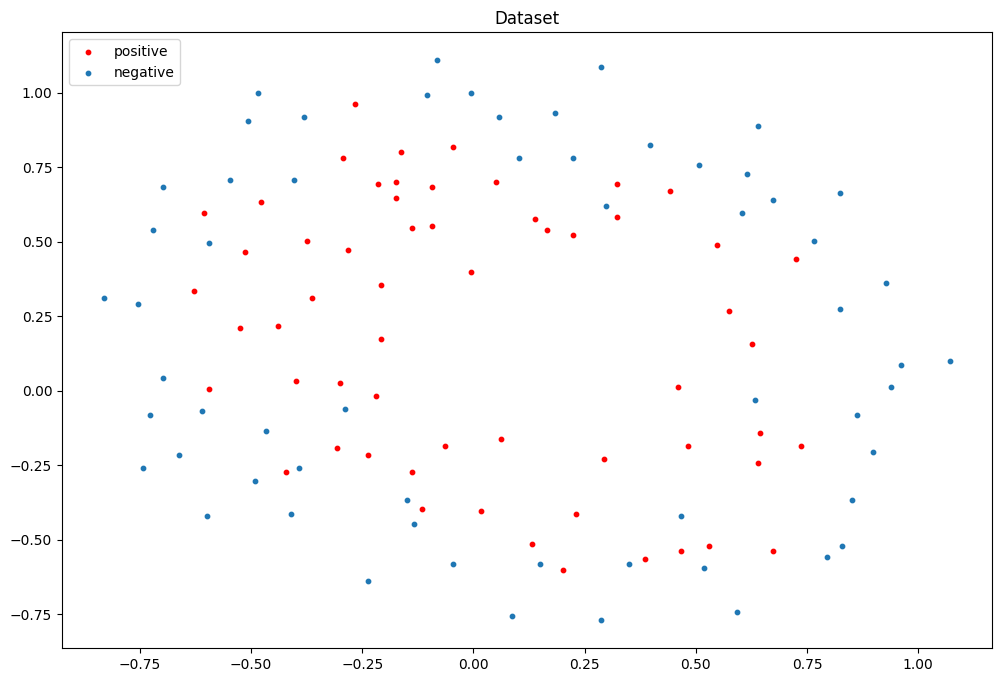

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
positive_data_idx= np.where(data[:,2]==1)
positive_data = data[positive_data_idx]
negative_data_idx= np.where(data[:, 2] == 0)
negative_data = data[negative_data_idx]
ax.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
ax.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
ax.set_title("Dataset")
plt.legend(loc=2)
plt.show()

划分训练集和验证集

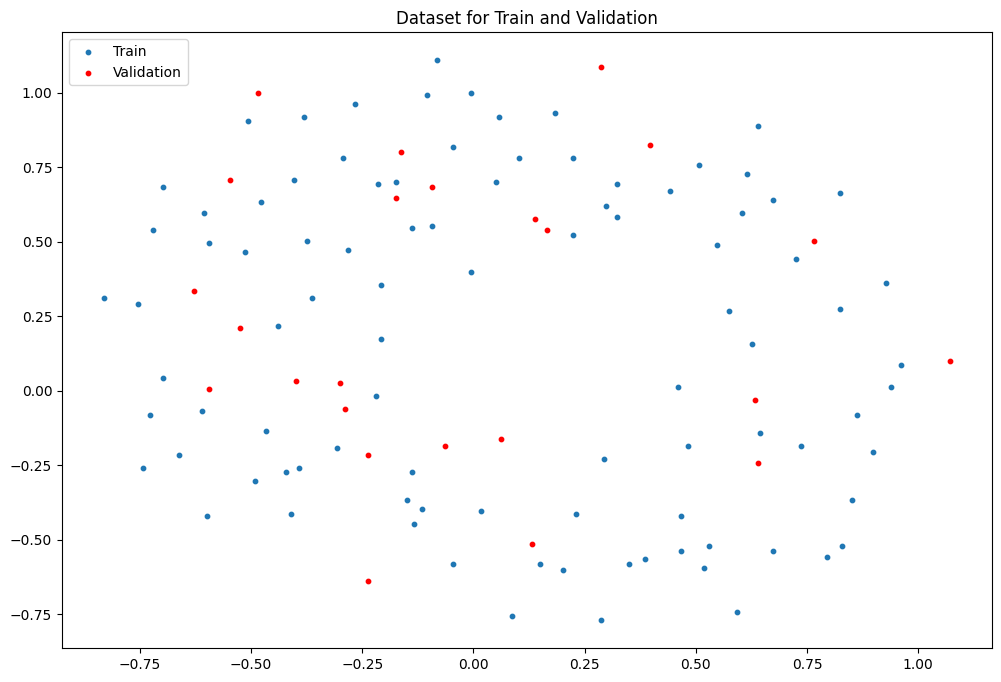

In [15]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data[:, :-1], data[:, -1], test_size=0.2)
# train_x, val_x, train_y, val_y = data[:, :-1], data[:, :-1], data[:, -1], data[:, -1]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train_x[:,0], y=train_x[:,1], s=10, label="Train")
ax.scatter(x=val_x[:,0], y=val_x[:,1], s=10, color="red", label="Validation")
ax.set_title('Dataset for Train and Validation')
ax.legend(loc=2)
plt.show()

查看训练集

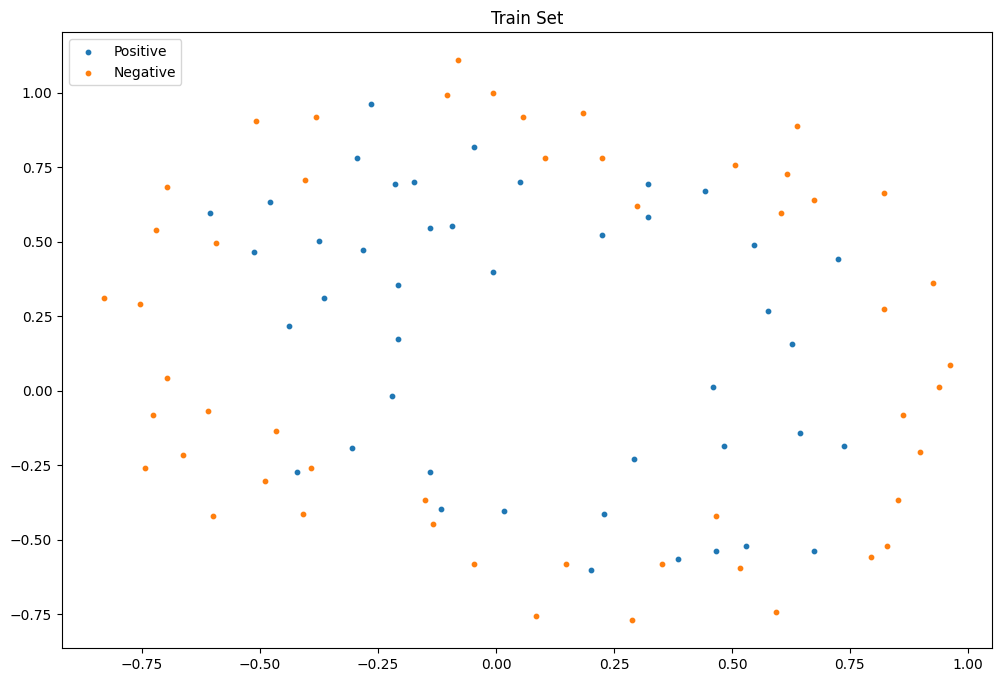

In [16]:
positive_train_data = train_x[np.where(train_y[:]==1)]
negative_train_data = train_x[np.where(train_y[:]==0)]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=positive_train_data[:,0], y=positive_train_data[:,1], s=10, label="Positive")
ax.scatter(x=negative_train_data[:,0], y=negative_train_data[:,1], s=10, label="Negative")
ax.set_title('Train Set')
ax.legend(loc=2)
plt.show()

查看测试集

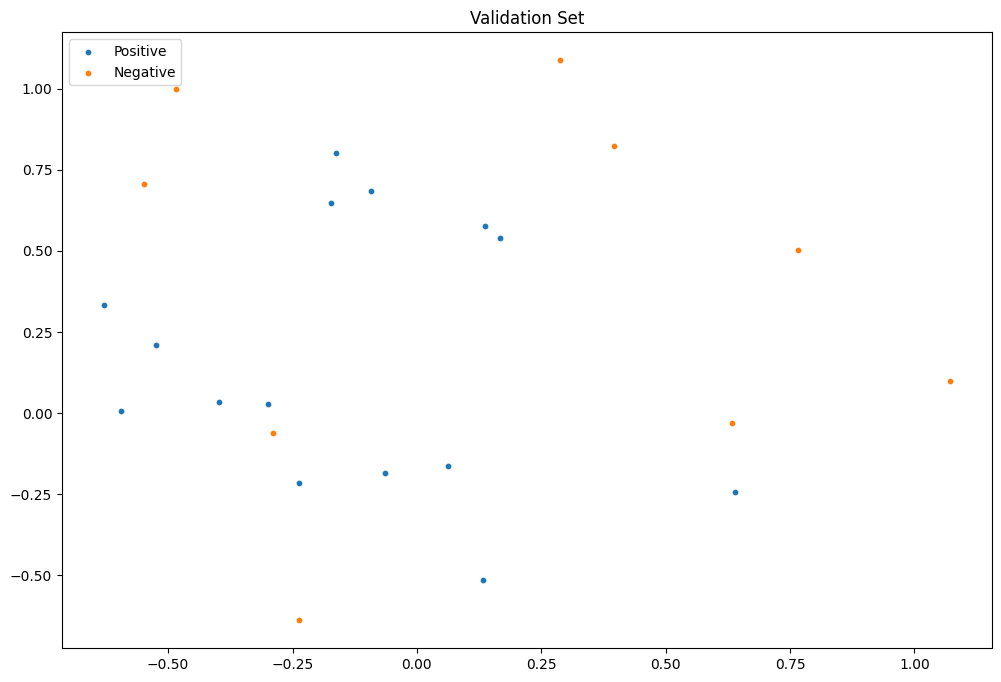

In [17]:
plt.show()
positive_val_data = val_x[np.where(val_y[:] == 1)]
negative_val_data = val_x[np.where(val_y[:] == 0)]
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x=positive_val_data[:, 0], y=positive_val_data[:, 1], s=10, label="Positive")
ax.scatter(x=negative_val_data[:, 0], y=negative_val_data[:, 1], s=10, label="Negative")
ax.legend(loc=2)
ax.set_title('Validation Set')
plt.show()

整理维度

In [18]:
train_y_ex = np.expand_dims(train_y,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)
val_y_ex.shape

(24, 1)

特征映射
$$\mathbf{X}=[x_{1}, x_{2}, x_{1}^{2}, x_{1}x_{2}, x_{2}^{2}, x_{1}^{3}, x_{1}^{2}x_{2},\cdots]$$

In [19]:
def feature_mapping(x, degree):
    feature = np.zeros([x.shape[0],1])
    for i in range(0, 1 + degree):
        for j in range(0, 1 + degree - i):
            if i==0 and j==0: continue
            feature=np.concatenate((feature, np.expand_dims(np.multiply(np.power(x[:, 0], i) , np.power(x[:, 1], j)), axis=1)),axis=1)
    return feature[:,1:]

train_x_map = feature_mapping(train_x,degree=6)
val_x_map = feature_mapping(val_x,degree=6)
train_x_map

array([[ 5.97220000e-01,  3.56671728e-01,  2.13011490e-01, ...,
         8.05599581e-02,  4.81120182e-02,  4.86791603e-02],
       [ 9.99270000e-01,  9.98540533e-01,  9.97811598e-01, ...,
        -1.02144015e-11, -1.02069450e-11,  6.47225339e-14],
       [ 4.43710000e-01,  1.96878564e-01,  8.73569877e-02, ...,
         2.00622115e-01,  8.90180386e-02,  1.45497176e-01],
       ...,
       [-4.04240000e-01,  1.63409978e-01, -6.60568493e-02, ...,
         1.30086551e-09, -5.25861874e-10,  2.17309584e-11],
       [ 5.97220000e-01,  3.56671728e-01,  2.13011490e-01, ...,
        -8.13294717e-02, -4.85715871e-02,  4.92376755e-02],
       [-5.65060000e-01,  3.19292804e-01, -1.80419592e-01, ...,
         8.49942439e-03, -4.80268475e-03,  3.27542318e-03]])

训练逻辑回归

In [20]:
from LogisticRegression import LogisticRegression

epochs = 8000
alpha = 0.5
logistic_reg2 = LogisticRegression(x=train_x_map,y=train_y_ex,val_x=val_x_map,val_y=val_y_ex,epoch=epochs,lr=alpha,scale=2,regularize=None)
theta, loss, val_loss = logistic_reg2.train()

Epoch: 1/8000, Train Loss: 0.3171
Accuracy on Val set: 87.50%
Epoch: 2/8000, Train Loss: 0.2680
Accuracy on Val set: 87.50%
Epoch: 3/8000, Train Loss: 0.2495
Accuracy on Val set: 83.33%
Epoch: 4/8000, Train Loss: 0.2381
Accuracy on Val set: 83.33%
Epoch: 5/8000, Train Loss: 0.2299
Accuracy on Val set: 83.33%
Epoch: 6/8000, Train Loss: 0.2236
Accuracy on Val set: 83.33%
Epoch: 7/8000, Train Loss: 0.2184
Accuracy on Val set: 83.33%
Epoch: 8/8000, Train Loss: 0.2139
Accuracy on Val set: 83.33%
Epoch: 9/8000, Train Loss: 0.2100
Accuracy on Val set: 83.33%
Epoch: 10/8000, Train Loss: 0.2065
Accuracy on Val set: 83.33%
Epoch: 11/8000, Train Loss: 0.2034
Accuracy on Val set: 83.33%
Epoch: 12/8000, Train Loss: 0.2005
Accuracy on Val set: 83.33%
Epoch: 13/8000, Train Loss: 0.1978
Accuracy on Val set: 83.33%
Epoch: 14/8000, Train Loss: 0.1954
Accuracy on Val set: 83.33%
Epoch: 15/8000, Train Loss: 0.1931
Accuracy on Val set: 83.33%
Epoch: 16/8000, Train Loss: 0.1909
Accuracy on Val set: 83.33%
E

查看精度，损失和F1

In [21]:
acc, test_loss = logistic_reg2.test(val_x_map,val_y_ex)
print("Accuracy on Test Set: {:.2f}%; Test Loss: {:.4f}".format(acc * 100,test_loss))
from sklearn.metrics import f1_score
f1 = f1_score(y_true=val_y_ex,y_pred=logistic_reg2.predict(val_x_map))
print("My F1 Score: {:.4f}".format(f1))

Accuracy on Test Set: 83.33%; Test Loss: 0.2627
My F1 Score: 0.8667


使用库函数验证

In [24]:
from sklearn.linear_model import LogisticRegression
sk_lr2 = LogisticRegression()
sk_lr2.fit(train_x_map,train_y)
sk_pred2 = sk_lr2.predict(val_x_map)
count2 = np.sum(np.equal(sk_pred2,val_y))
sk_acc2 = count2/val_y.shape[0]
sk_prob2 = sk_lr2.predict_proba(val_x_map)

from LogisticRegression import bce_loss
sk_loss2 = bce_loss(sk_prob2[:,1], val_y_ex)
sk_f12 = f1_score(y_true=val_y_ex,y_pred=sk_pred2)
print("Sklearn Accuracy: {:.2f}%".format(sk_acc2 * 100))
print("Sklearn Val Loss: {:.4f}".format(sk_loss2))
print("Sklearn F1 Score: {:.4f}".format(sk_f12))

Sklearn Accuracy: 83.33%
Sklearn Val Loss: 0.5712
Sklearn F1 Score: 0.8667


可视化决策边界

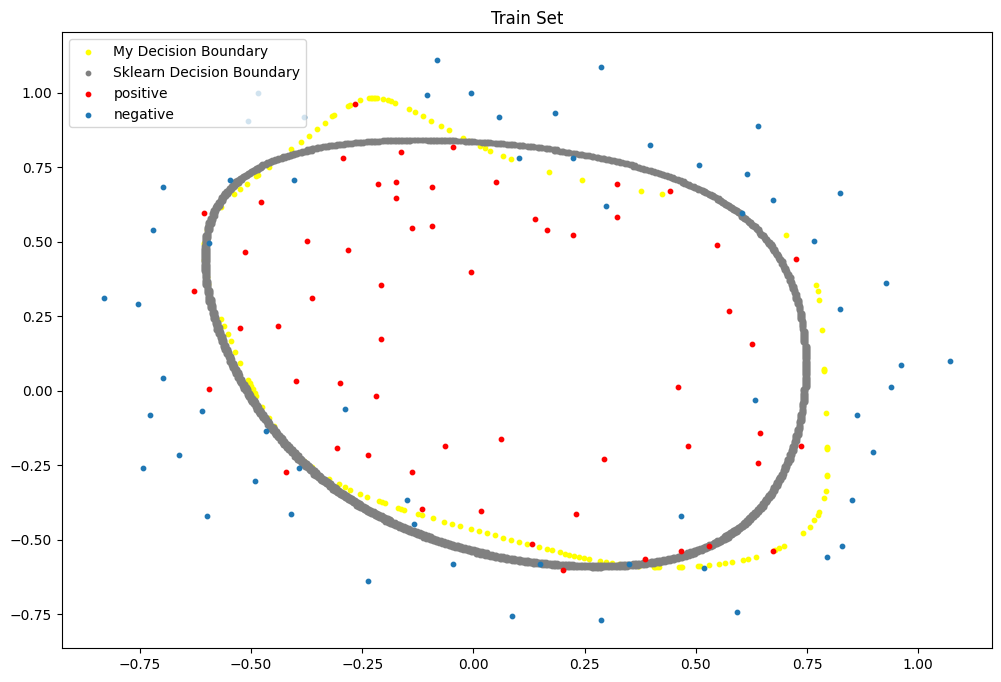

In [25]:
t1 = np.linspace(-1, 1.5, 700)
t2 = np.linspace(-1, 1.5, 700)

coordinates = np.array([[x, y] for x in t1 for y in t2])

mapped_cord_x = feature_mapping(np.array(coordinates), degree=6)  # this is a dataframe
prob = logistic_reg2.get_inner_product(mapped_cord_x)
sk_prob_coor = sk_lr2.predict_proba(mapped_cord_x)
idx1 = np.where(abs(prob[0,:])<5e-3)
idx2 = np.where(np.logical_and(sk_prob_coor[:,0] >= 0.495, sk_prob_coor[:,0] <= 0.505))
my_bd = coordinates[idx1]
sk_bd = coordinates[idx2]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=my_bd[:, 0], y=my_bd[:, 1], s=10, color="yellow", label="My Decision Boundary")
ax.scatter(x=sk_bd[:, 0], y=sk_bd[:, 1], s=10, color="gray", label="Sklearn Decision Boundary")
ax.scatter(x=positive_data[:, 0], y=positive_data[:, 1], s=10, color="red",label="positive")
ax.scatter(x=negative_data[:, 0], y=negative_data[:, 1], s=10, label="negative")
ax.set_title('Train Set')
ax.legend(loc=2)
plt.show()